In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datafr = pd.read_csv("FreyerSutherland.dat", sep="\t", index_col=False)

data = np.genfromtxt('FreyerSutherland.dat')

data = data[1:]
time = data[:,0]
yobs = data[:,1]
subj = data[:,2]
Oxigen = data[:,5]
Glucose = data[:,6]


In [127]:
datafr[datafr.Subject==1]
#datafr.head()

,Time,Level,Subject,Variable,Weight,Oxygen,Glucose
0,4.5080,0.000005,1,1,1,0.28,16.5
1,5.2750,0.000004,1,1,1,0.28,16.5
2,5.8399,0.000012,1,1,1,0.28,16.5
3,7.2749,0.000017,1,1,1,0.28,16.5
4,8.2928,0.000033,1,1,1,0.28,16.5
5,9.3369,0.000037,1,1,1,0.28,16.5
6,10.3865,0.000054,1,1,1,0.28,16.5
7,11.3590,0.000078,1,1,1,0.28,16.5
8,12.6038,0.000126,1,1,1,0.28,16.5
9,13.3784,0.000145,1,1,1,0.28,16.5


soggetto 1  len 15 , Oxygen 0.280 , Glucose 16.500 
Initial Objective: 2.810208740170101e-08
Final Objective: 1.1618362657892146e-08
Solution
x1 = 0.08984834745526313
x2 = 0.003427068533003335


soggetto 2  len 13 , Oxygen 0.280 , Glucose 16.500 
Initial Objective: 1.3129421141631316e-07
Final Objective: 1.9243016771216883e-09
Solution
x1 = 0.06513674792434693
x2 = 0.048127431491450295


soggetto 3  len 16 , Oxygen 0.070 , Glucose 16.500 
Initial Objective: 3.8011474453155053e-07
Final Objective: 4.585375667383414e-09
Solution
x1 = 0.119176013450993
x2 = 0.000549597274802586


soggetto 4  len 12 , Oxygen 0.070 , Glucose 16.500 
Initial Objective: 9.489647471113416e-09
Final Objective: 1.9954827506820843e-09
Solution
x1 = 0.11975267623318345
x2 = 0.0012424865375738532


soggetto 5  len 18 , Oxygen 0.280 , Glucose 0.080 
Initial Objective: 7.790961639640156e-08
Final Objective: 2.0913141514907142e-08
Solution
x1 = 0.10740825474262239
x2 = 0.0019312669694423685


soggetto 6  len 12 , Oxyg

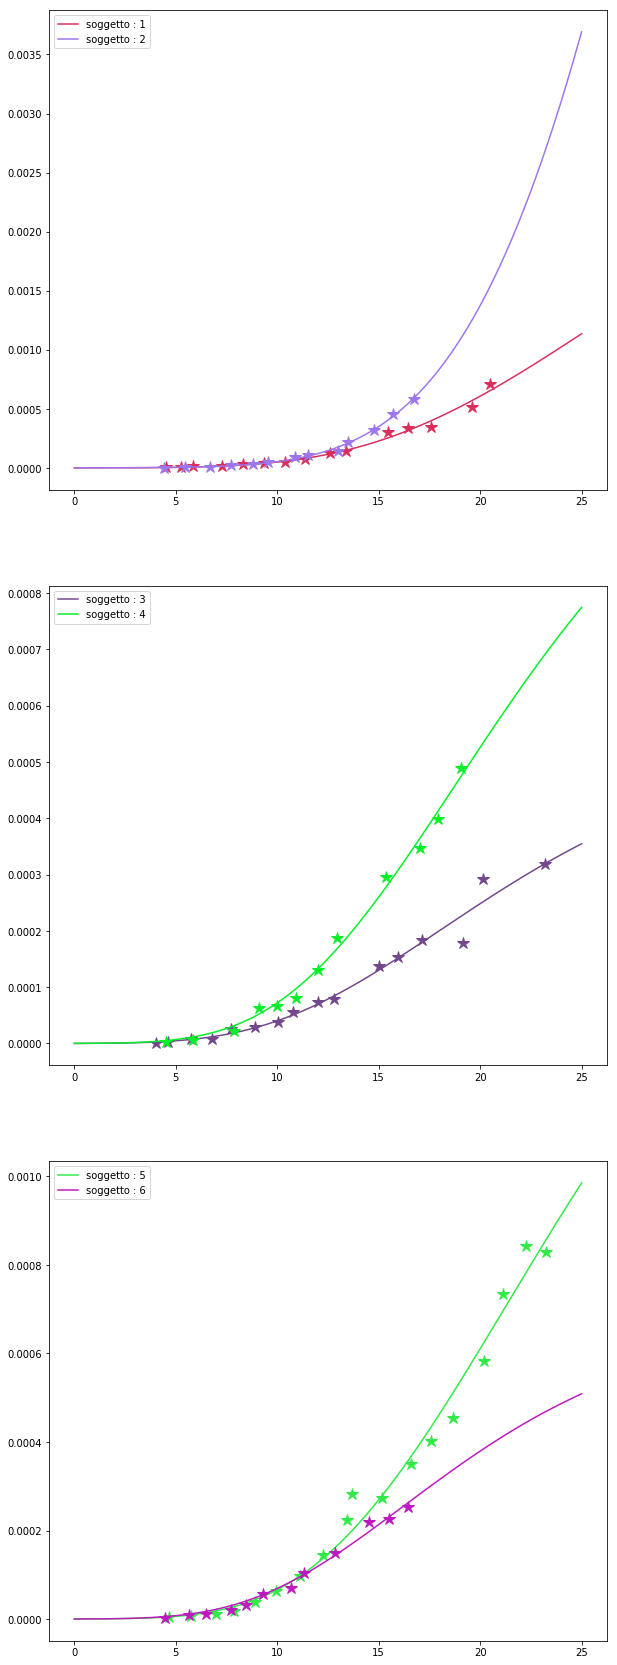

In [128]:
#import numpy as np
from scipy.optimize import minimize
alpha_list = [] ;kappa_list = []
f, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,30))

for num in range(1,7):

    timei = time[subj == num]
    yobsi = yobs[subj == num]
    print("soggetto %d  len %d , Oxygen %.3f , Glucose %.3f "% (num , len(timei), Oxigen[subj==num][0], Glucose[subj==num][0]))


    
    def x_fun_espl(t, alpha, kappa): #, Y_0
        y = kappa * np.exp( np.log(1e-7/kappa) *  np.exp(- alpha* t))
        return y

    def objective(phii):
        global timei, yobsi
        alpha = phii[0]; kappa = phii[1] #; Y_0 = phii[2]
        x_hat_i= x_fun_espl(timei, alpha, kappa)  # Y_0
        return np.sum(np.power((yobsi-x_hat_i), 2))




    # initial guesses
    n = 2
    x0 = np.zeros(n)
    x0[0] = 0.10
    x0[1] = 0.002
    #x0[2] = 1e-7

    # show initial objective
    print('Initial Objective: ' + str(objective(x0)))

    # optimize
    solution = minimize(objective,x0, method='Nelder-Mead') 
    x = solution.x

    # show final objective
    print('Final Objective: ' + str(objective(x)))

    # print solution
    print('Solution')
    print('x1 = ' + str(x[0]))
    print('x2 = ' + str(x[1]))
    #print('x3 = ' + str(x[2]))
    print("\n")
    alpha_list.append(x[0]); kappa_list.append(x[1]); #Y_0_list.append(x[2])
    c_r = tuple(np.random.rand(1,3).tolist()[0])
    if num < 3:
        ax1.plot(timei , yobsi, "*", markersize=12, color=c_r)

        tempo = np.linspace(0.0, 25, 25000)
        x_hati = x_fun_espl(tempo, x[0], x[1])  #, x[2]
        ax1.plot(tempo, x_hati, label= "soggetto : "+str(num), color=c_r)
    elif num < 5:
        ax2.plot(timei , yobsi, "*", markersize=12, color=c_r)

        tempo = np.linspace(0.0, 25, 25000)
        x_hati = x_fun_espl(tempo, x[0], x[1])  #, x[2]
        ax2.plot(tempo, x_hati, label= "soggetto : "+str(num), color=c_r)
    else:
        ax3.plot(timei , yobsi, "*", markersize=12, color=c_r)

        tempo = np.linspace(0.0, 25, 25000)
        x_hati = x_fun_espl(tempo, x[0], x[1])  #, x[2]
        ax3.plot(tempo, x_hati, label= "soggetto : "+str(num), color=c_r)
        
    
ax1.legend(); ax2.legend(); ax3.legend()


In [129]:
print("alpha : %.4e +- %.4e "% (np.mean(alpha_list),np.sqrt(np.var(alpha_list)))) 
print("kappa : %.4e +- %.4e "% (np.mean(kappa_list),np.sqrt(np.var(kappa_list))))

alpha : 1.0598e-01 +- 2.2765e-02 
alpha : 9.3281e-03 +- 1.7378e-02 


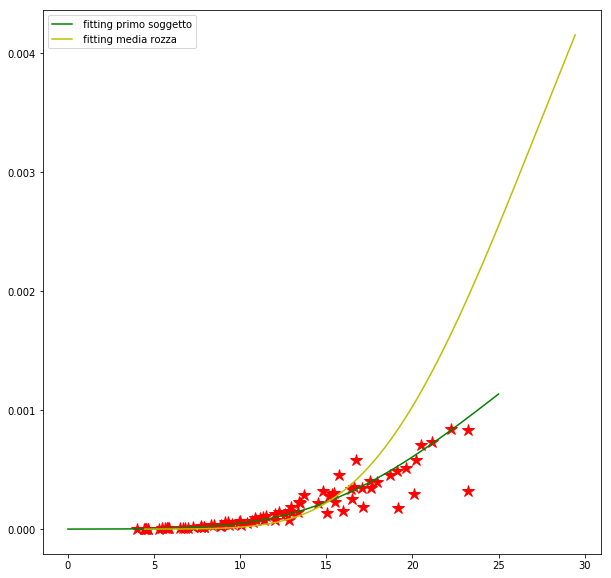

In [125]:
def drift( X, par = []):
    alpha = par[0]; kappa = par[1]    
    dXdt = alpha* np.log(kappa/X)*X
    return dXdt 


def eulerStep_vec(par=[]):
    time_vec = np.linspace(0.0, 25, 25000)
    delta_time = time_vec[1] - time_vec[0]
    xmean = np.zeros(25000)
    xmean[0] = 1e-7
    for i in range(1,25000):
        xmean[i]= xmean[i-1] + drift(xmean[i-1], par)* delta_time
      
    return (time_vec, xmean)


plt.figure(figsize=(10,10))
for num in range(1,7):
    timei = time[subj == num]
    yobsi = yobs[subj == num]
    plt.plot(timei , yobsi, "r*", markersize=12)



t_v_voluti, x_m_voluti = eulerStep_vec(par=[0.27, 5e-4]) # risultati di Simona   
t_v_voluti2, x_m_voluti2 = eulerStep_vec(par=[alpha_list[0], kappa_list[0]])
# miei risultati  8.565e-02 , 5.973e-03     #8.220e-02 , 4.064e-03  #9.37250847e-02, 2.47581883e-03   
#2.03241629e-01, 9.38913914e-04 #2.21169055e-01, 7.28137895e-04
t_v_mean, x_m_mean = eulerStep_vec(par=[np.mean(alpha_list), np.mean(kappa_list)])


#plt.plot(timei[0]+t_v_voluti, x_m_voluti, "b-", label="fitting di Simona")
plt.plot(t_v_voluti2, x_m_voluti2, "g-", label=" fitting primo soggetto")
plt.plot(timei[0]+t_v_mean, x_m_mean, "y-", label=" fitting media rozza")

plt.legend()

